In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import imutils
from PIL import Image

## OpenCV

In [4]:
img_dir = "./package_detection/Blue/blue.png"
#image = Image.open(img_dir)
#image
#display(*[image_source_pil, image_mask_pil])

# Read input image
image=cv2.imread(img_dir)
image=imutils.resize(image,width=530,height=350)
cv2.imshow('',image)
cv2.waitKey(0)

-1

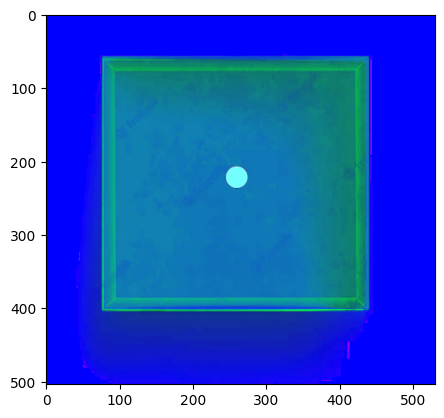

In [5]:
image=cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(image)

In [7]:
def get_colour(image):
    height, width, _ = image.shape
    x = int(width / 2)
    y = int(height / 2)
    hue_val = image[225, 260][0]

    #print(x,y,hue_val)

    if hue_val < 5:
        colour = "red"
    elif hue_val < 78:
        colour = "green"
    elif hue_val < 131:
        colour = "blue"
    else:
        colour = "red"

    #print(colour)
    return colour

In [8]:
print(get_colour(image))

blue


### Camera capture

In [ ]:
#cam = cv2.VideoCapture(0)
#ret,frame = cam.read()

#img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 360) 

while True:
    _, frame = cap.read()
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    height, width, _ = frame.shape

    x = int(width / 2)
    y = int(height / 2)


    pixel_centre = frame[y, x]

    colour = get_colour(hsv_frame)
    cv2.circle(frame,(x,y), 5, (0, 0, 255), 3)
    cv2.putText(frame, colour, (10,50),0,1,(255,0,0),2)

    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows
# Display the resulting frame
#cv2.imshow('frame', img)
#cv2.imwrite("capture.png", img)

#cv2.VideoWriter(filename, fourcc, fps, frameSize)